In [46]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import LabelEncoder, normalize

In [2]:
"""
    Created by Mohsen Naghipourfar on 9/15/18.
    Email : mn7697np@gmail.com or naghipourfar@ce.sharif.edu
    Website: http://ce.sharif.edu/~naghipourfar
    Github: https://github.com/naghipourfar
    Skype: mn7697np
"""

'\n    Created by Mohsen Naghipourfar on 9/15/18.\n    Email : mn7697np@gmail.com or naghipourfar@ce.sharif.edu\n    Website: http://ce.sharif.edu/~naghipourfar\n    Github: https://github.com/naghipourfar\n    Skype: mn7697np\n'

In [88]:
def dbscan(data, minimum_points=5, eps=0.7):
    dbscan = DBSCAN(eps=eps, min_samples=minimum_points)
    y_pred = dbscan.fit_predict(data)
    return y_pred


def pca_analysis(data, n_components=2):
    pca = PCA(n_components=n_components)
    x = pca.fit_transform(data)
    return x[:, 0], x[:, 1]


def hdbscan():
    pass


def model_based():
    pass


def k_means(data, k=10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    return y_kmeans


def k_medoids(k=10):
    pass


def gaussian_mixture_models(k=10):
    pass

def ica_analysis(data, n_components=2):
    ica = FastICA(n_components=n_components)
    x = ica.fit_transform(data)
    return x[:, 0], x[:, 1]

def plot_points(data, labels, predictions=None):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    x, y = pca_analysis(data, n_components=2)
    plt.close("all")
    plt.figure(figsize=(15, 10))
    plt.scatter(x, y, c=labels, s=50, cmap='viridis')
#     plt.xlim(0, 1)
#     plt.ylim(-0.25, 0.25)
    plt.show()
    # plt.savefig("/Users/Future/Desktop/test.pdf")
def normalize_data_2(data):
    from sklearn.preprocessing import MinMaxScaler
    scalar = MinMaxScaler((-1, 1))
    return scalar.fit_transform(data)
def normalize_data(data):
    data = normalize(data, axis=0, norm='max')
    return data

In [111]:
data = pd.read_csv("../Data/3mermotif_na.csv", index_col="icgc_sample_id")
cancer_types = data['cancer_type']
data = data.drop(["cancer_type"], axis=1)
data = normalize_data(data.values)
predictions = k_means(data, k=23)
x = pd.DataFrame({"cancer_type": cancer_types, "prediction" : predictions})
# pd.DataFrame(data).describe()
# plot_points(data, cancer_types)

In [112]:
x = x[x["cancer_type"] == "Uterus"]
x["prediction"].describe()

count    310.000000
mean       1.993548
std        2.864800
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: prediction, dtype: float64

In [165]:
import os
files = [file for file in os.listdir("../Results/classic/") if file.endswith(".csv")]
indices = []
for idx, file in enumerate(files):
    alg_result = pd.read_csv("../Results/classic/" + file)
    alg_name = file.split(".")[0]
    indices.append(alg_name)
    if idx == 0:
        data = alg_result
    else:
        data = pd.concat((data, alg_result), ignore_index=True)
data.index = indices    
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data

,Bladder,Blood,Bone,Brain,Breast,Cervix,Colorectal,Esophagus,Head&Neck,Kidney,Liver,Lung,Nervous_system,Ovary,Pancreas,Skin,Stomach,Uterus
HDBSCAN,43.220339,50.092593,41.850220,35.249764,41.909385,37.980769,63.059701,61.141805,5.625879,10.500611,29.406780,26.625387,10.377358,46.122449,61.529126,30.345912,44.247788,38.709677
GMM,72.881356,32.222222,41.409692,47.125353,22.384035,77.884615,72.947761,44.751381,16.877637,23.443223,38.644068,56.965944,33.018868,41.224490,42.233010,76.257862,62.241888,66.451613
KMeans,47.881356,23.981481,29.074890,23.656927,14.401294,38.461538,60.261194,37.937385,12.658228,54.212454,36.694915,56.346749,69.811321,38.775510,38.349515,77.358491,46.607670,42.258065
DBSCAN,33.474576,45.648148,26.431718,24.693685,40.884574,32.692308,45.149254,59.852670,5.063291,10.134310,29.237288,21.671827,6.603774,46.530612,58.252427,75.786164,32.448378,33.548387


In [119]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

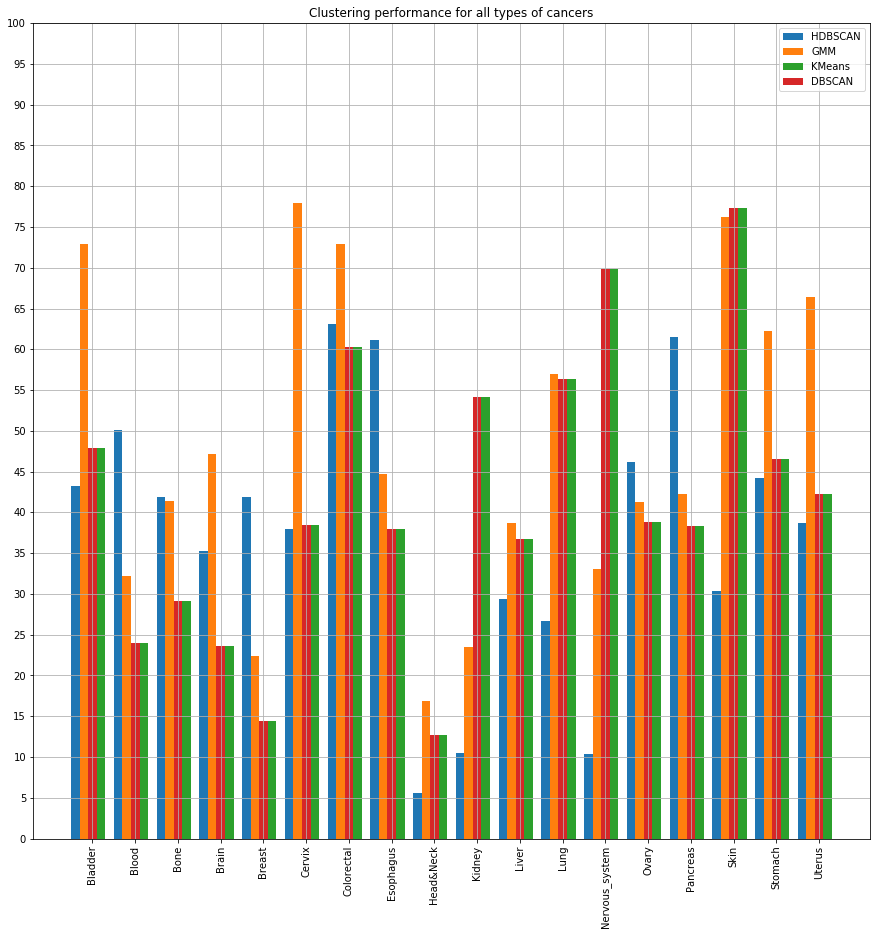

In [166]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
import numpy as np

x = data.columns
_x = np.arange(len(x))
y = data.iloc[0, :]
z = data.iloc[1, :]
t = data.iloc[2, :]
k = data.iloc[3, :]

plt.close("all")
plt.figure(figsize=(15, 15))
ax = plt.subplot(111)

ax.bar(_x-.4, y,width=0.2,align='center', label= "HDBSCAN")
ax.bar(_x-.2, z,width=0.2,align='center', label="GMM")
ax.bar(_x+.2, t,width=0.2,align='center', label= "KMeans")
ax.bar(_x, t,width=0.2,align='center', label= "DBSCAN")
# autolabel(rects)

ax.legend()
plt.yticks(np.arange(0, 105, 5))
plt.xticks(_x, x, rotation=90)
plt.grid()
plt.title("Clustering performance for all types of cancers")
plt.savefig("../Results/classic/allClustering.pdf")
plt.show()

In [133]:
df = pd.DataFrame()
df['A'] = [2]
df

,A
0,2
